In [13]:
# Install required packages
!pip install pandas numpy seaborn matplotlib scikit-learn==1.5.2 xgboost==2.1.3

In [14]:
import pandas as pd

In [15]:
# Load cleaned datasets
df_train = pd.read_csv(r"C:\Users\prath\PycharmProjects\CodeSocHackathon\DiseaseSpreadPrediction\Data\dengue_train_cleaned.csv")
df_test = pd.read_csv(r"C:\Users\prath\PycharmProjects\CodeSocHackathon\DiseaseSpreadPrediction\Data\dengue_test_cleaned.csv")

In [16]:
# Define features and target variable
X = df_train.drop(columns=['total_cases'])
y = df_train['total_cases']

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',             # Root Mean Square Error
    'max_depth': 6,
    'eta': 0.1,
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'validation')], early_stopping_rounds=10)

[0]	validation-rmse:54.53242
[1]	validation-rmse:52.17625
[2]	validation-rmse:49.92243
[3]	validation-rmse:48.01777
[4]	validation-rmse:46.32942
[5]	validation-rmse:44.99034
[6]	validation-rmse:43.45404
[7]	validation-rmse:42.08502
[8]	validation-rmse:41.13096
[9]	validation-rmse:40.37961
[10]	validation-rmse:39.24947
[11]	validation-rmse:38.29376
[12]	validation-rmse:37.78936
[13]	validation-rmse:36.97148
[14]	validation-rmse:36.57258
[15]	validation-rmse:35.78400
[16]	validation-rmse:35.36207
[17]	validation-rmse:34.99615
[18]	validation-rmse:34.29957
[19]	validation-rmse:33.74968
[20]	validation-rmse:33.43360
[21]	validation-rmse:33.04783
[22]	validation-rmse:32.77205
[23]	validation-rmse:32.59875
[24]	validation-rmse:32.38993
[25]	validation-rmse:32.12764
[26]	validation-rmse:31.96171
[27]	validation-rmse:31.80941
[28]	validation-rmse:31.53703
[29]	validation-rmse:31.31869
[30]	validation-rmse:31.28969
[31]	validation-rmse:31.18569
[32]	validation-rmse:31.14761
[33]	validation-rmse

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on validation set
y_pred = model.predict(dval)

# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 29.82


In [20]:
import xgboost as xgb
import sklearn

print("XGBoost version:", xgb.__version__)
print("Scikit-learn version:", sklearn.__version__)

XGBoost version: 2.1.3
Scikit-learn version: 1.5.2


In [21]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],  # Change 'eta' to 'learning_rate'
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create an XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'subsample': 0.8}
Best RMSE: 20.829559967742625


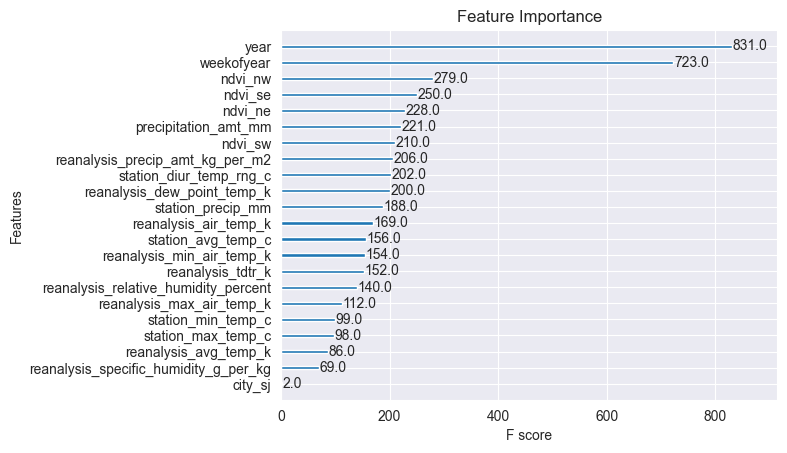

In [22]:
# Step 8: Feature Importance Analysis
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

In [23]:
print("Columns in df_test:", df_test.columns.tolist())

Columns in df_test: ['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm', 'city_sj']


In [24]:
# Step 9: Make Predictions on Test Data
dtest = xgb.DMatrix(df_test)

# Make predictions on test set
test_predictions = model.predict(dtest)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'year': df_test['year'].values,
    'weekofyear': df_test['weekofyear'].values,
    'total_cases': test_predictions.astype(int)  # Convert to integer if required
})

# If you want to include city information, you can add it based on city_sj
submission_df['city'] = ['San Juan' if city == 1 else 'Iquitos' for city in df_test['city_sj']]

# Save submission file
submission_df.to_csv(r"C:\Users\prath\PycharmProjects\CodeSocHackathon\DiseaseSpreadPrediction\Data\submission.csv", index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv
